<a href="https://colab.research.google.com/github/kunakl07/orcagsoc/blob/kunakl07-patch-1/Conv2_AND_Inception_RESNET_V2_of_Train_and_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip '/content/pcen_and_wavelet_test.zip'

Archive:  /content/pcen_and_wavelet_test.zip
   creating: content/Round2_OS_07_05/test/
   creating: content/Round2_OS_07_05/test/nocalls/
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg21_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg46_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg33_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg42_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg88_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg26_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg12_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg54_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg82_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg7_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg6_0000.png  
  inf

In [0]:
!unzip '/content/pcen_and_wavelet_trainsave.zip'

Archive:  /content/pcen_and_wavelet_trainsave.zip
   creating: content/Round2_OS_07_05/train/
   creating: content/Round2_OS_07_05/train/nocalls/
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333219_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333201_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333373_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod260_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod252_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2305_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod225_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333427_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2250_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2135_0000.png  
  inflating: content/Round2_OS_07_05/train/nocall

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics

In [0]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report

In [0]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [0]:
train_path='/content/content/Round2_OS_07_05/train'
test_path='/content/content/Round2_OS_07_05/test'

In [0]:
%cd '/content/content/Round2_OS_07_05'

/content/content/Round2_OS_07_05


In [0]:
!mkdir valid

In [0]:
%cd valid

/content/content/Round2_OS_07_05/valid


In [0]:
!mkdir calls

In [0]:
!mkdir nocalls

In [0]:
import os, random
random.choice(os.listdir("/content/content/Round2_OS_07_05/train/calls"))

In [0]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['calls','nocalls'],batch_size=10)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['calls','nocalls'],batch_size=3)



NameError: ignored

In [0]:
test_batches2=ImageDataGenerator().flow_from_directory(test_path,target_size=(607,617),classes=['calls','nocalls'],batch_size=201)


Found 201 images belonging to 2 classes.


In [0]:
import keras

In [0]:
import cv2
img=cv2.imread('/content/content/Round2_OS_07_05/train/nocalls/neg_calls_pod2103_0000.png')
img.shape

(607, 617, 3)

In [0]:
input_shape=img.shape

In [0]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding = 'same', strides=2, input_shape=input_shape))
model.add(Conv2D(32, (5, 5), padding = 'same', strides=2))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=2, padding = 'same'))
model.add(Conv2D(64, (5, 5), strides=2, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))



model.add(Flatten())
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 304, 309, 32)      2432      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 152, 155, 32)      25632     
_________________________________________________________________
activation_17 (Activation)   (None, 152, 155, 32)      0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 152, 155, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 76, 78, 64)        51264     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 38, 39, 64)        102464    
_________________________________________________________________
activation_18 (Activation)   (None, 38, 39, 64)       

In [0]:
train_data_path='/content/content/Round2_OS_07_05/train'

In [0]:

train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),
    batch_size=157,
    class_mode='categorical',
shuffle=True)


Found 1570 images belonging to 2 classes.


In [0]:

history = model.fit_generator(
    train_batches,
    steps_per_epoch=157,
    epochs=50 )

# model.save_weights('orca_detection_3.h5')
model.save('srkw_pod.h5')

Epoch 1/50
157/157 [==============================] - 16s 103ms/step - loss: 1.0705 - accuracy: 0.5051
Epoch 2/50
157/157 [==============================] - 16s 103ms/step - loss: 0.8340 - accuracy: 0.5178
Epoch 3/50
157/157 [==============================] - 16s 104ms/step - loss: 0.7352 - accuracy: 0.5287
Epoch 4/50
157/157 [==============================] - 16s 104ms/step - loss: 0.7119 - accuracy: 0.5223
Epoch 5/50
157/157 [==============================] - 16s 104ms/step - loss: 0.6970 - accuracy: 0.5280
Epoch 6/50
157/157 [==============================] - 16s 105ms/step - loss: 0.6972 - accuracy: 0.5210
Epoch 7/50
157/157 [==============================] - 16s 105ms/step - loss: 0.6793 - accuracy: 0.5573
Epoch 8/50
157/157 [==============================] - 16s 104ms/step - loss: 0.6742 - accuracy: 0.5694
Epoch 9/50
157/157 [==============================] - 16s 103ms/step - loss: 0.6686 - accuracy: 0.5854
Epoch 10/50
157/157 [==============================] - 16s 104ms/step - l

In [0]:
predictions=model.predict_generator(test_batches,steps=67,verbose=2)

In [0]:
test_labels2=test_labels2[:,0]


In [0]:
test_labels2.size

201

In [0]:
predictions[:,0].size

201

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion_matrix',cmap=plt.cm.Blues
):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  print(cm)
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j], horizontalalignment="center",color='white' if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [0]:
test_labels2

array([1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.],
      dtype=float32)

In [0]:
np.round(predictions[:,0])

array([0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [0]:
cm=confusion_matrix(test_labels2,np.round(predictions[:,0]))

In [0]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(25,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

test_imgs2, test_labels2 = next(test_batches2)

# we plot these samples of images and their labels 1 batch at a time.
plots(test_imgs2, titles=test_labels2)

In [0]:
cm_plot_labels=['calls','nocalls']

In [0]:
import itertools


#Inception ResnetV2

In [0]:
from keras.applications import InceptionResNetV2


In [0]:
incresnet_model = keras.applications.inception_resnet_v2.InceptionResNetV2()
incresnet_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_224 (Conv2D)             (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 149, 149, 32) 96          conv2d_224[0][0]                 
__________________________________________________________________________________________________
activation_224 (Activation)     (None, 149, 149, 32) 0           batch_normalization_204[0][0]    
________________________________________________________________________________

In [0]:


# re-sizing all the images to this
IMAGE_SIZE = [224, 224]


# add preprocessing layer to the front of resnet152
incresnet_model = InceptionResNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# not training existing weights
for layer in incresnet_model.layers:
  layer.trainable = True
  


In [0]:

  
# useful for getting number of classes
#folders = glob('/content/content/Round2_OS_07_05/train/*')
  

# our layers
x = Flatten()(incresnet_model.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# creating a model object
model = Model(inputs=incresnet_model.input, outputs=prediction)

# structure of the model
model.summary()


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/content/Round2_OS_07_05/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/content/Round2_OS_07_05/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
'''

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_630 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_610 (BatchN (None, 111, 111, 32) 96          conv2d_630[0][0]                 
__________________________________________________________________________________________________
activation_630 (Activation)     (None, 111, 111, 32) 0           batch_normalization_610[0][0]    
____________________________________________________________________________________________

'r=model.fit_generator(training_set,\n                         samples_per_epoch = 8000,\n                         nb_epoch = 5,\n'

In [0]:
# fit the model
r = model.fit_generator(
  training_set,
  epochs=50,
  steps_per_epoch=len(training_set),
)

Epoch 1/50
50/50 [==============================] - 91s 2s/step - loss: 1.3739 - accuracy: 0.7580
Epoch 2/50
50/50 [==============================] - 34s 682ms/step - loss: 1.1710 - accuracy: 0.8197
Epoch 3/50
50/50 [==============================] - 34s 679ms/step - loss: 0.6077 - accuracy: 0.8389
Epoch 4/50
50/50 [==============================] - 34s 686ms/step - loss: 1.0460 - accuracy: 0.8146
Epoch 5/50
50/50 [==============================] - 34s 679ms/step - loss: 0.4681 - accuracy: 0.8624
Epoch 6/50
50/50 [==============================] - 34s 688ms/step - loss: 0.5316 - accuracy: 0.8229
Epoch 7/50
50/50 [==============================] - 34s 684ms/step - loss: 1.4447 - accuracy: 0.8350
Epoch 8/50
50/50 [==============================] - 34s 685ms/step - loss: 0.9351 - accuracy: 0.8567
Epoch 9/50
50/50 [==============================] - 34s 679ms/step - loss: 0.8512 - accuracy: 0.8783
Epoch 10/50
50/50 [==============================] - 34s 682ms/step - loss: 0.3919 - accuracy:

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
vgg16_model=keras.applications.vgg16.VGG16()


553467904/553467096 [==============================] - 40s 0us/step


In [0]:
vgg16_model2=keras.applications.vgg16.VGG16()


In [0]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
vgg16_model = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model.layers[:-1]: # just exclude last layer from copying
  model.add(layer)
for layer in model.layers:
  layer.trainable = False
#model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
vgg16_model2 = keras.applications.vgg16.VGG16()
model = Sequential()
for layer in vgg16_model2.layers[:-1]: # just exclude last layer from copying
  model.add(layer)
for layer in model.layers:
  layer.trainable = False
#model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in model.layers:
    layer.trainable=False

In [0]:

model.add(Dense(2, activation='softmax'))

In [0]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:

import tensorflow as tf

In [0]:

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=False
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [0]:
opt = SGD(lr=1e-4, momentum=0.9)

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [0]:
%cd /content/

/content


In [0]:
model.fit_generator(train_batches,steps_per_epoch=157,epochs=250,verbose=2)
model.save('PCEN_VGG_Srkw.h5')
from google.colab import files
files.download('/content/PCEN_VGG_Srkw.h5.h5') 

Epoch 1/250


ValueError: ignored

In [0]:

test_imgs2, test_labels2 = next(test_batches2)

# we plot these samples of images and their labels 1 batch at a time.
plots(test_imgs2, titles=test_labels2)

In [0]:
predictions=model.predict_generator(test_batches,steps=67,verbose=0)

In [0]:
test_labels2=test_labels2[:,0]


In [0]:
test_labels2.size

201

In [0]:
predictions[:,0].size

201

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion_matrix',cmap=plt.cm.Blues
):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  print(cm)
  thresh=cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j], horizontalalignment="center",color='white' if cm[i,j]>thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [0]:
test_labels2

array([0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.],
      dtype=float32)

In [0]:
np.round(predictions[:,0])

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [0]:
cm=confusion_matrix(test_labels2,np.round(predictions[:,0]))

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


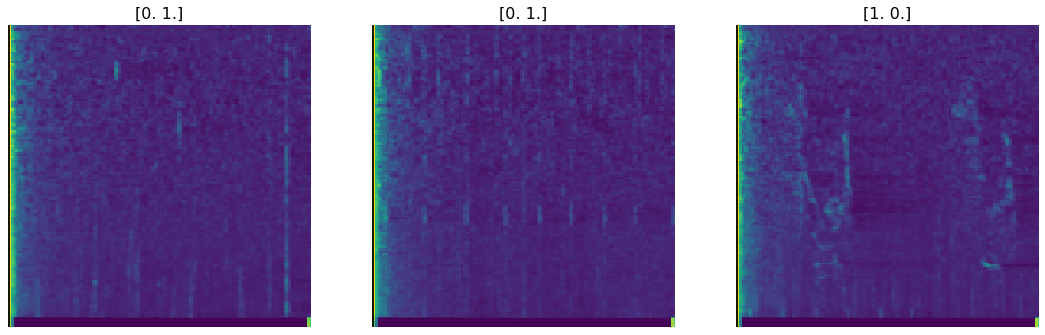

In [0]:

# plot function, used to plot images with labels within jupyter notebook
def plots(ims, figsize=(25,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

test_imgs, test_labels = next(test_batches)

# we plot these samples of images and their labels 1 batch at a time.
plots(test_imgs, titles=test_labels)

In [0]:
cm_plot_labels=['calls','nocalls']

[[52 48]
 [48 53]]


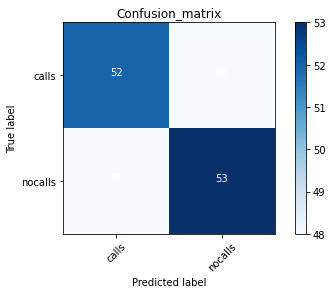

In [0]:
plot_confusion_matrix(cm,cm_plot_labels,title='Confusion_matrix')

In [0]:
import itertools

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline